In [1]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from source.acquire_m import *
from source.model_marley import *
from scipy import stats as scs


%load_ext autoreload
%autoreload 2

In [2]:
wrangle_obj = wrangle('Coronavirus')

In [3]:
acquire_df = wrangle_obj.acquire_data()
acquire_df

,index,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,0,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.000,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
1,1,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.000,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
2,2,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.000,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [4]:
bioactivity_df = wrangle_obj.get_bioactivity_data()
bioactivity_df

List of single protein ChEMBL ID's from chosen disease:
0       CHEMBL3927
1       CHEMBL5118
2    CHEMBL4523582
Name: target_chembl_id, dtype: object
Input a single protein target ID from the list:CHEMBL3927


,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
activity_comment,,,,,,,,,,,,,,,,,,,,,
NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,7.200
NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,9.400
NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.500
NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.110
NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,NaN,NaN,BAO_0000190,BAO_0000019,assay format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,10.600
NaN,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,NaN,NaN,BAO_0000190,BAO_0000019,assay format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,10.100
NaN,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,NaN,NaN,BAO_0000190,BAO_0000019,assay format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,11.500


In [5]:
wrangle_obj.prepare_dataframe()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,"7,200.000",INTERMEDIATE,281.271,1.893,0.000,5.000,5.143
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,"9,400.000",INTERMEDIATE,415.589,3.813,0.000,2.000,5.027
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,"13,500.000",INACTIVE,421.190,2.661,0.000,4.000,4.870
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,"13,110.000",INACTIVE,293.347,3.631,0.000,3.000,4.882
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],"2,000.000",INTERMEDIATE,338.344,3.539,0.000,5.000,5.699
...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,"10,600.000",INACTIVE,338.359,3.401,0.000,5.000,4.975
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,"10,100.000",INACTIVE,296.366,3.443,0.000,3.000,4.996
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,"11,500.000",INACTIVE,276.291,4.096,0.000,3.000,4.939
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,"10,700.000",INACTIVE,278.307,3.291,0.000,3.000,4.971


In [6]:
wrangle_obj.preprocess_bioactivity_data(tests = True)

Saving 133 molecules.

Kruskal Wallis H tests for molecular descriptors (active vs. inactive)...

 MW
   H statistic = 12, p = 0.002
   Different distribution. Reject H0.

 LogP
   H statistic = 1, p = 0.644
   Same distribution. Fail to reject H0.

 NumHDonors
   H statistic = 23, p = 0.000
   Different distribution. Reject H0.

 NumHAcceptors
   H statistic = 13, p = 0.002
   Different distribution. Reject H0.

Computing fingerprints (takes several minutes if molecules > 1000)...
Success!



In [7]:
target_id = wrangle_obj.user_target

In [8]:
bioactivity_df = pd.read_csv(f'{target_id}_bioactivity_preprocessed.csv')
bioactivity_df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,"7,200.000",INTERMEDIATE,281.271,1.893,0.000,5.000,5.143
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,"9,400.000",INTERMEDIATE,415.589,3.813,0.000,2.000,5.027
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,"13,500.000",INACTIVE,421.190,2.661,0.000,4.000,4.870
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,"13,110.000",INACTIVE,293.347,3.631,0.000,3.000,4.882
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],"2,000.000",INTERMEDIATE,338.344,3.539,0.000,5.000,5.699


In [9]:
bioactivity_df.shape

(133, 9)

In [10]:
fingerprint_df = pd.read_csv(f'{target_id}_pubchem_fp.csv')
fingerprint_df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL187579,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL188487,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL185698,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL426082,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL187717,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fingerprint_df.shape

(133, 882)

Three representations of molecule CHEMBL187579:
1. SMILES notation: Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21
2. Chemical fingerprint: [1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 

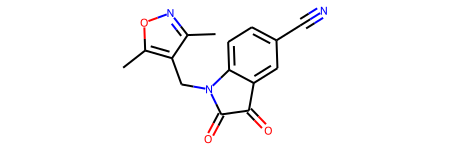

In [12]:
mol = bioactivity_df.molecule_chembl_id.values[0]
SMILES = bioactivity_df.canonical_smiles[bioactivity_df.molecule_chembl_id==mol].values[0]
fingerprint = np.array(fingerprint_df[fingerprint_df.Name==mol])[0][1:]

print(f'Three representations of molecule {mol}:')
print('1. SMILES notation:', SMILES)
print('2. Chemical fingerprint:', fingerprint)
print('3. Molecular Visualization')
Chem.MolFromSmiles(SMILES) #an example molecule

<a id='Model'></a>
## 4. Modeling the chemical fingerprints

In this part, we use machine learning to determine the charchteristics of molecules with a high chance of being viable drug candidates.

A note on modeling: $R^2$ is the percent of the variance in [potency](https://en.wikipedia.org/wiki/Potency_(pharmacology)) (as measured by $pIC_{50}$) is explained by the chemical fingerprint of the molecule.

In [13]:
# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [14]:
modeling_df, target = premodeling_processing(bioactivity_df, fingerprint_df)
modeling_df.head()

,molecule_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,281.271,1.893,0.000,5.000
1,CHEMBL188487,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,415.589,3.813,0.000,2.000
2,CHEMBL185698,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,421.190,2.661,0.000,4.000
3,CHEMBL426082,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,293.347,3.631,0.000,3.000
4,CHEMBL187717,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,338.344,3.539,0.000,5.000


In [15]:
target.head()

,pIC50,bioactivity_class,standard_value
0,5.143,0,"7,200.000"
1,5.027,0,"9,400.000"
2,4.870,1,"13,500.000"
3,4.882,1,"13,110.000"
4,5.699,0,"2,000.000"


In [16]:
names = ['Linear Regressor', 'Random Forrest Regressor', 'Tweedies Regressor']
models = [LinearRegression(normalize = True), RandomForestRegressor]

In [17]:
model_obj = Modeling_class(modeling_df, target, models, names)

In [19]:
avg_metrics, outputs = model_obj.regression_modeling(splits = 10)

Scaling has already been run. Moving on to modeling, this may take a while...
Modeling done! Average scores are abstract represntations of how well this model type did, not actual scores.


In [20]:
avg_metrics

avg_score
model            metric                                                           
Linear Regressor neg_root_mean_squared_error                 1,834,943,551,024.567
                 r2                          3,294,515,088,483,170,648,064,000.000